In [11]:
import pandas as pd
import numpy as np
from pandasql import sqldf
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
from joypy import joyplot
sns.set_theme(style="whitegrid")


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.calibration import CalibratedClassifierCV

In [ ]:
users = pd.read_csv("users2.csv")

In [ ]:
pd.set_option('display.max_columns', None)
users_total.describe(percentiles=[0,0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99,1],include="all")

In [ ]:
#exemplo de lambda
X["label"] = X["label"].apply(lambda x: 0 if x == 'human' else 1)

In [ ]:
#using train test split
X_train, X_test, y_train, y_test = train_test_split(X.drop(["label"], axis=1), X["label"], test_size=0.25, random_state=42)

In [ ]:
#some basic model template

clf_ = RandomForestClassifier(random_state=42)
clf = CalibratedClassifierCV(base_estimator=clf_)

clf.fit(X_train,y_train)


y_test_scored = clf.predict_proba(X_test)

auc = roc_auc_score(y_test,y_test_scored[:,1])
auc

In [ ]:
#example of building AUC and precision recall curves
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, avg_score[:,1])
roc_auc = metrics.auc(fpr, tpr)

fpr1, tpr1, threshold1 = metrics.roc_curve(y_test, y_test_scored[:,1])
roc_auc1 = metrics.auc(fpr1, tpr1)

precision,recall,threshold_ = metrics.precision_recall_curve(y_test, avg_score[:,1])
precision1,recall1,threshold_1 = metrics.precision_recall_curve(y_test, y_test_scored[:,1])


# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr1, tpr1, 'r', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.figure()
plt.title('Precision Recall Curve')
plt.plot(precision, recall, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(precision1, recall1, 'r', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [40]:
startDate = "2013-01-01"
endDate = "2013-01-01"
temperature = [24,34.38,34.36,34.74,35.26,35.23,35.29,35.64,36.02,36.1,36.98,37.01,36.75,36.01,35.66,34.72,33.9,32.62,31.51,30.73,29.5,26.94,25.47,23.84,22.55]
n = 12



In [41]:
import itertools
import statsmodels.api as sm

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

In [43]:
y = temperature
best_order = [0,0,0]
current_AIC = float("inf")
for param in pdq:
    mod = sm.tsa.statespace.SARIMAX(y,
                                    order=param)
    results = mod.fit()
    if results.aic < current_AIC:
        current_AIC = results.aic
        best_order = param
    print('ARIMA{} - AIC:{}'.format(param, results.aic))

ARIMA(0, 0, 0) - AIC:247.6386637817639
ARIMA(0, 0, 1) - AIC:218.69798564432915
ARIMA(0, 0, 2) - AIC:192.36805050022616
ARIMA(0, 1, 0) - AIC:110.57034356090065
ARIMA(0, 1, 1) - AIC:111.23031524695791
ARIMA(0, 1, 2) - AIC:111.66721190054525
ARIMA(0, 2, 0) - AIC:104.22152784381177
ARIMA(0, 2, 1) - AIC:105.51277605999138
ARIMA(0, 2, 2) - AIC:106.97742307672114
ARIMA(1, 0, 0) - AIC:121.70040963231364
ARIMA(1, 0, 1) - AIC:122.14560952189572
ARIMA(1, 0, 2) - AIC:122.46730965456726
ARIMA(1, 1, 0) - AIC:110.31851389700884
ARIMA(1, 1, 1) - AIC:111.6598186351726
ARIMA(1, 1, 2) - AIC:113.16468732924207
ARIMA(1, 2, 0) - AIC:105.49721360266975
ARIMA(1, 2, 1) - AIC:107.36222535303865
ARIMA(1, 2, 2) - AIC:108.92460581292794
ARIMA(2, 0, 0) - AIC:120.7558198938058
ARIMA(2, 0, 1) - AIC:124.18031017534817


c:\programdata\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2) - AIC:117.5814268303342
ARIMA(2, 1, 0) - AIC:111.66227884674622
ARIMA(2, 1, 1) - AIC:113.47945349417924
ARIMA(2, 1, 2) - AIC:115.15174181327295
ARIMA(2, 2, 0) - AIC:107.22995243300339
ARIMA(2, 2, 1) - AIC:108.95704391208038
ARIMA(2, 2, 2) - AIC:110.92362279841227


In [44]:
best_order

(0, 2, 0)

In [39]:
#minimun: ARIMA(0, 2, 0) - AIC:144.16346375175917

mod = sm.tsa.statespace.SARIMAX(y,order=[0,2,0])
results = mod.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   26
Model:               SARIMAX(0, 2, 0)   Log Likelihood                 -71.082
Date:                Wed, 16 Jun 2021   AIC                            144.163
Time:                        00:01:45   BIC                            145.342
Sample:                             0   HQIC                           144.476
                                 - 26                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        21.8805      2.331      9.386      0.000      17.311      26.450
Ljung-Box (Q):                       85.98   Jarque-Bera (JB):               167.15
Prob(Q):                              0.00   Pr

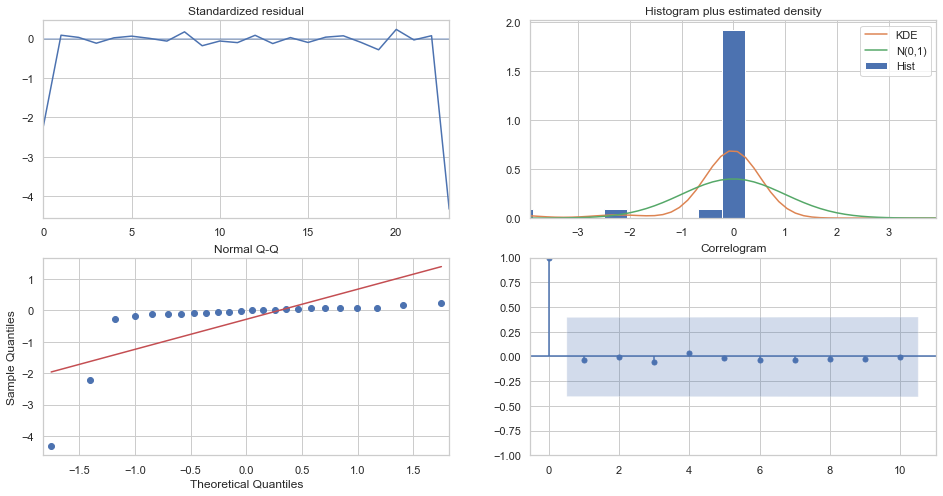

In [20]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [36]:
pred = results.get_prediction(start=18, dynamic=True).predicted_mean

pred2 = results.forecast(steps=2)

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

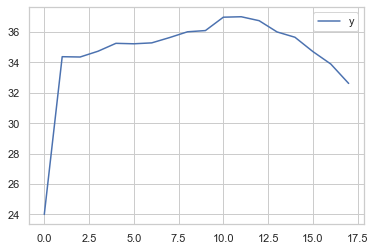

In [30]:
ax = pd.DataFrame(y[:18],columns=["y"]).plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [34]:
pred

array([31.34, 30.06, 28.78, 27.5 , 26.22, 24.94, 23.66, 22.38])

In [35]:
results

In [37]:
pred2

array([-20.55, -42.1 ])